# Análise estatística dos participantes da edição 2025

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('stats.csv')
df.head()

,Filme,Título original,País,Ano,Duração,Gênero,Dirigido por,Categoria,Assistido por,Flag
0,O Grande Hotel Budapeste,The Grand Budapest Hotel,EUA,2014,100,"Comédia, Drama",Wes Anderson,NaN,ok1na,0
1,Avatar 2 - O Caminho da Água,Avatar: The Way of Water,EUA,2022,192,"Sci-Fi, Ação, Aventura",James Cameron,8.0,EdzinhoHowlett,0
2,Túmulo dos Vagalumes,火垂るの墓,Japão,1988,89,"Guerra, Aventura",Isao Takahata,1.0,aNobree,1
3,O Peso do Talento,The Unbearable Weight of Massive Talent,EUA,2022,107,"Crime, Ação, Comédia",Tom Gormican,4.0,UmaPessoaHumana,0
4,Eu Vi o Brilho da TV,I Saw the TV Glow,EUA,2024,100,"Drama, Terror",Jane Schoenbrun,4.0,belovacomis,0


In [3]:
categoria_pesos = {
    1: 7,
    2: 2,
    3: 1,
    4: 1,
    5: 1,
    6: 1,
    7: 1,
    8: 1,
}
total_possivel = sum(categoria_pesos.values())

categoria_cores = {
    1: "#1f77b4",  # Azul
    2: "#ff7f0e",  # Laranja
    3: "#2ca02c",  # Verde
    4: "#d62728",  # Vermelho
    5: "#9467bd",  # Roxo
    6: "#8c564b",  # Marrom
    7: "#e377c2",  # Rosa
    8: "#7f7f7f",  # Cinza escuro
}

categoria_nomes = {
    1: "7 países",
    2: "2 brasileiros",
    3: "100 anos",
    4: "Desafio passado",
    5: "País extinto",
    6: "Mulher na direção",
    7: "Terror",
    8: "3h ou mais"
}

In [4]:
def contar_categorias(df, pessoa):
    df_pessoa = df[df["Assistido por"] == pessoa]
    
    # Categoria 5: país extinto → excluir da contagem de países
    pais_item5 = df_pessoa[df_pessoa["Categoria"] == 5]["País"]
    pais_item5 = pais_item5.iloc[0] if not pais_item5.empty else None

    # --- Categoria 1: 7 países distintos (exceto Brasil e país do item 5)
    paises_proibidos = {"Brasil"}
    if pais_item5:
        paises_proibidos.add(pais_item5)

    paises_validos = df_pessoa[df_pessoa["Categoria"] == 1]["País"]
    n_paises_distintos = len(set(p for p in paises_validos if p not in paises_proibidos))
    preenchimento_categoria = {1: min(n_paises_distintos, categoria_pesos[1])}

    # --- Categoria 2: 2 filmes brasileiros
    n_brasileiros = df_pessoa[(df_pessoa["Categoria"] == 2) & (df_pessoa["País"] == "Brasil")].shape[0]
    preenchimento_categoria[2] = min(n_brasileiros, categoria_pesos[2])

    for cat in range(3, 9):
        preenchimento_categoria[cat] = 1 if cat in df_pessoa["Categoria"].values else 0

    return preenchimento_categoria

Categorias faltosas de ok1na: 7 países (5/7), 2 brasileiros (1/2), Desafio passado, País extinto, 3h ou mais


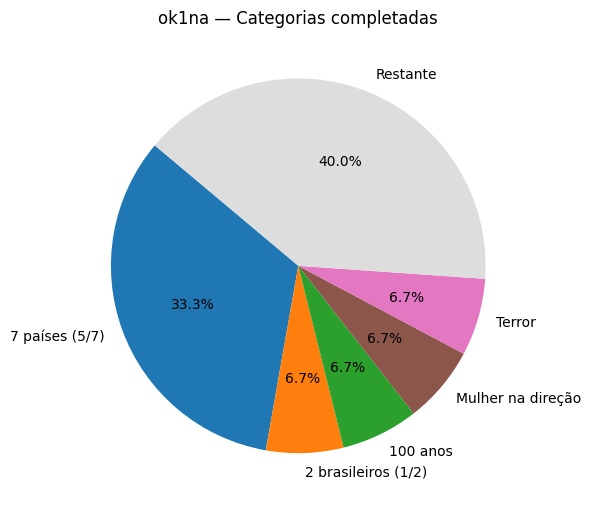

EdzinhoHowlett completou todas as categorias!


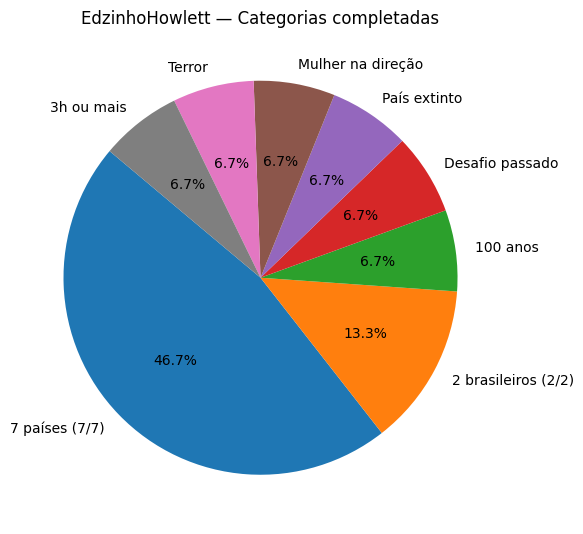

UmaPessoaHumana completou todas as categorias!


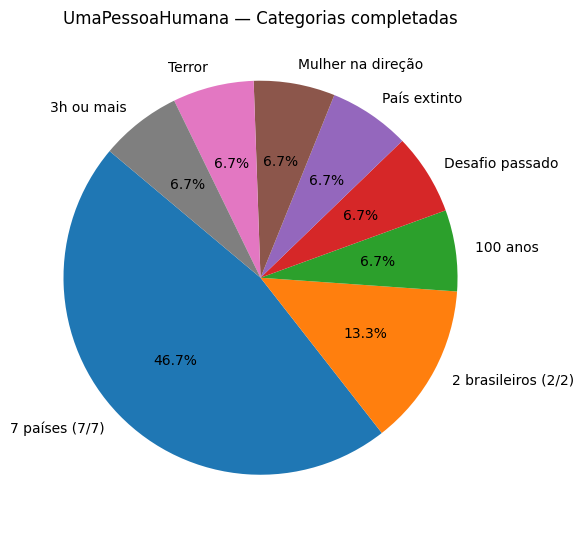

Categorias faltosas de belovacomis: País extinto


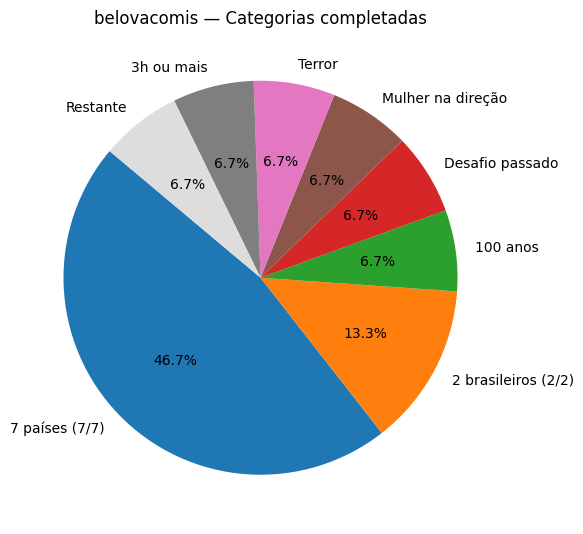

Categorias faltosas de mathamen: 2 brasileiros (1/2), Desafio passado


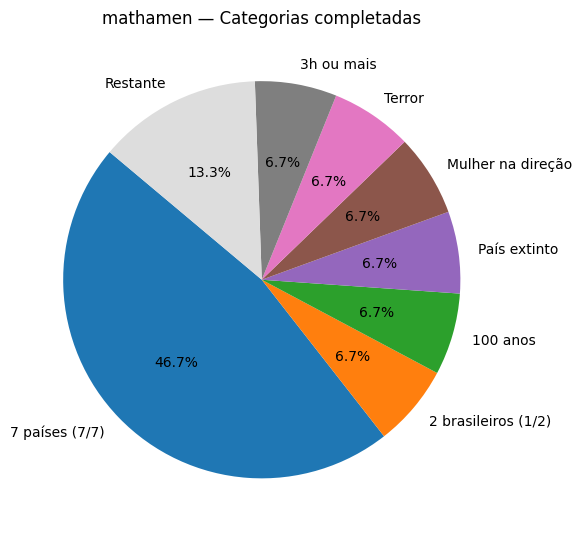

Categorias faltosas de joaov0805: 7 países (6/7)


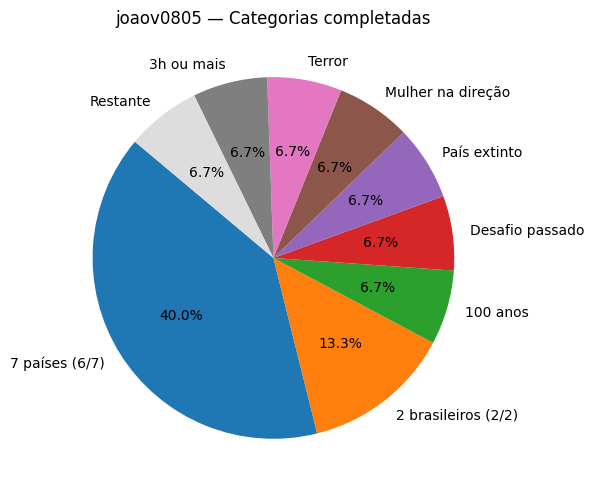

Categorias faltosas de xeremel: País extinto, 3h ou mais


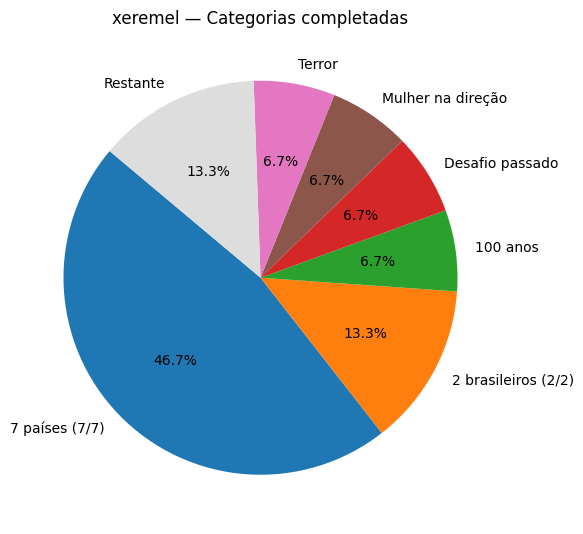

Categorias faltosas de Carol__Rosa: 7 países (6/7), 3h ou mais


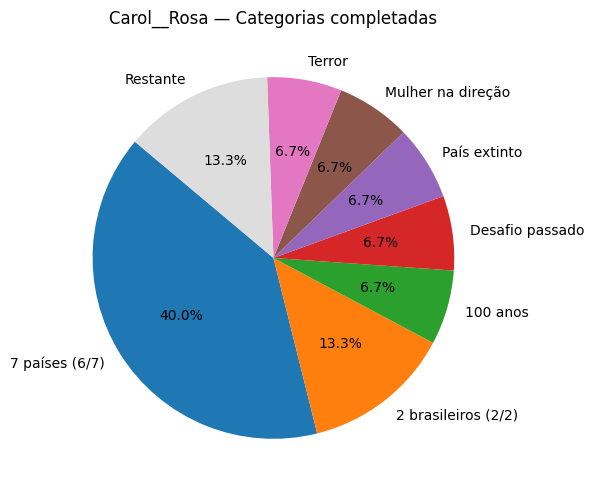

Categorias faltosas de Belle_Is: 100 anos


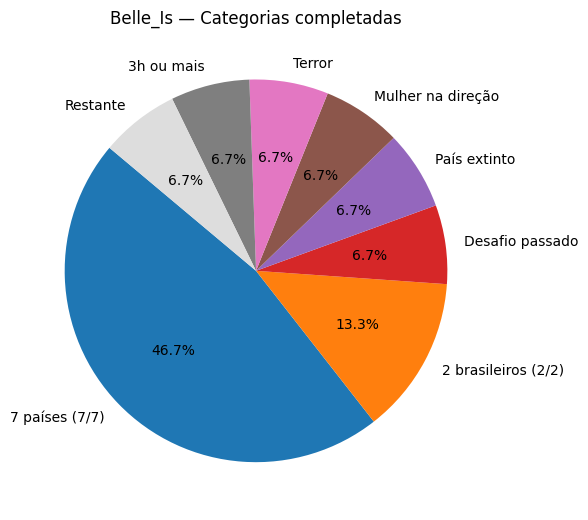

Categorias faltosas de Brad_Pittson69: País extinto, 3h ou mais


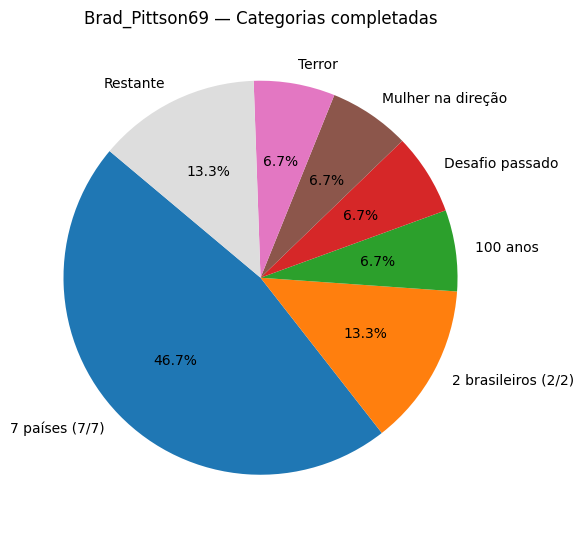

In [5]:
participantes = df["Assistido por"].dropna().unique()
participantes = [p for p in participantes if p not in ["Tunim73", "aNobree"]]

for pessoa in participantes:
    preenchimento_categoria = contar_categorias(df, pessoa)

    labels = []
    sizes = []
    colors = []

    for cat in range(1, 9):
        valor = preenchimento_categoria.get(cat, 0)
        if valor > 0:
            if cat == 1:
                label = f"{categoria_nomes[cat]} ({valor}/7)"
            elif cat == 2:
                label = f"{categoria_nomes[cat]} ({valor}/2)"
            else:
                label = categoria_nomes[cat]
            labels.append(label)
            sizes.append(valor)
            colors.append(categoria_cores[cat])

    restante = total_possivel - sum(sizes)
    if restante > 0:
        labels.append("Restante")
        sizes.append(restante)
        colors.append("#DDDDDD")

    # --- NOVO: imprimir categorias faltosas ---
    faltosas = []
    for cat in range(1, 9):
        valor = preenchimento_categoria.get(cat, 0)
        maximo = categoria_pesos[cat]
        if valor < maximo:
            if cat in (1, 2):  # categorias com múltiplos filmes
                faltosas.append(f"{categoria_nomes[cat]} ({valor}/{maximo})")
            else:  # demais categorias são binárias
                faltosas.append(categoria_nomes[cat])

    if faltosas:
        print(f"Categorias faltosas de {pessoa}: {', '.join(faltosas)}")
    else:
        print(f"{pessoa} completou todas as categorias!")

    # --- gráfico ---
    plt.figure(figsize=(6, 6))
    plt.pie(
        sizes,
        labels=labels,
        colors=colors,
        autopct="%1.1f%%",
        startangle=140,
    )
    plt.title(f"{pessoa} — Categorias completadas")
    plt.tight_layout()
    plt.show()

